<a href="https://colab.research.google.com/github/adeviney/customer-retention-model/blob/main/DataCleaningandEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Data Gathering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo Bootcamp/Project 2/WA_Fn-UseC_-Telco-Customer-Churn[1].csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Values

> The TotalCharges column should be a float64 dtype, but it is being read as an object due to some rows having a missing value filled in with the space character. Below I have replaced each of the missing values with a 0.

In [ ]:
df.loc[df['TotalCharges'] == ' ', 'tenure'] 

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0).astype('float32')

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Consistent Mapping of Data

> SeniorCitizen should not be a numerical datatype, since it is a categorical column. The other categorical columns use "Yes/No" labeling, so I will use this convention to maintain consistency.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: "No", 1: "Yes"})

### Numeric Columns

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.732178
std,24.559481,30.090047,2266.794434
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.350000,1394.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


> No apparent outliers, but will explore further in the exploratory data visualization.

### Categorical Columns

In [ ]:
# checking for inconsistencies in categorical data
data_types = df.dtypes
str_cols = data_types[data_types =='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n****************")

- customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

****************
- gender:
Male      3555
Female    3488
Name: gender, dtype: int64

****************
- SeniorCitizen:
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

****************
- Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

****************
- Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

****************
- PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

****************
- MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

****************
- InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

****************
- OnlineSecurity:
No             

In [ ]:
# each row is a unique customer
df[['customerID']].duplicated().sum()

0

> Data is clean!

## Exploratory Data Visualization 

### Univarate Visuals for Features

#### Categorical

In [ ]:
str_cols = data_types[data_types =='object'].index
str_cols = np.delete(str_cols, [0,17])
str_cols
# deleting customerID -- already confirmed that each row is unique and this isn't something we need to visualize
# deleting Churn -- this is the target, not a feature
str_cols.size

16

In [ ]:
str_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

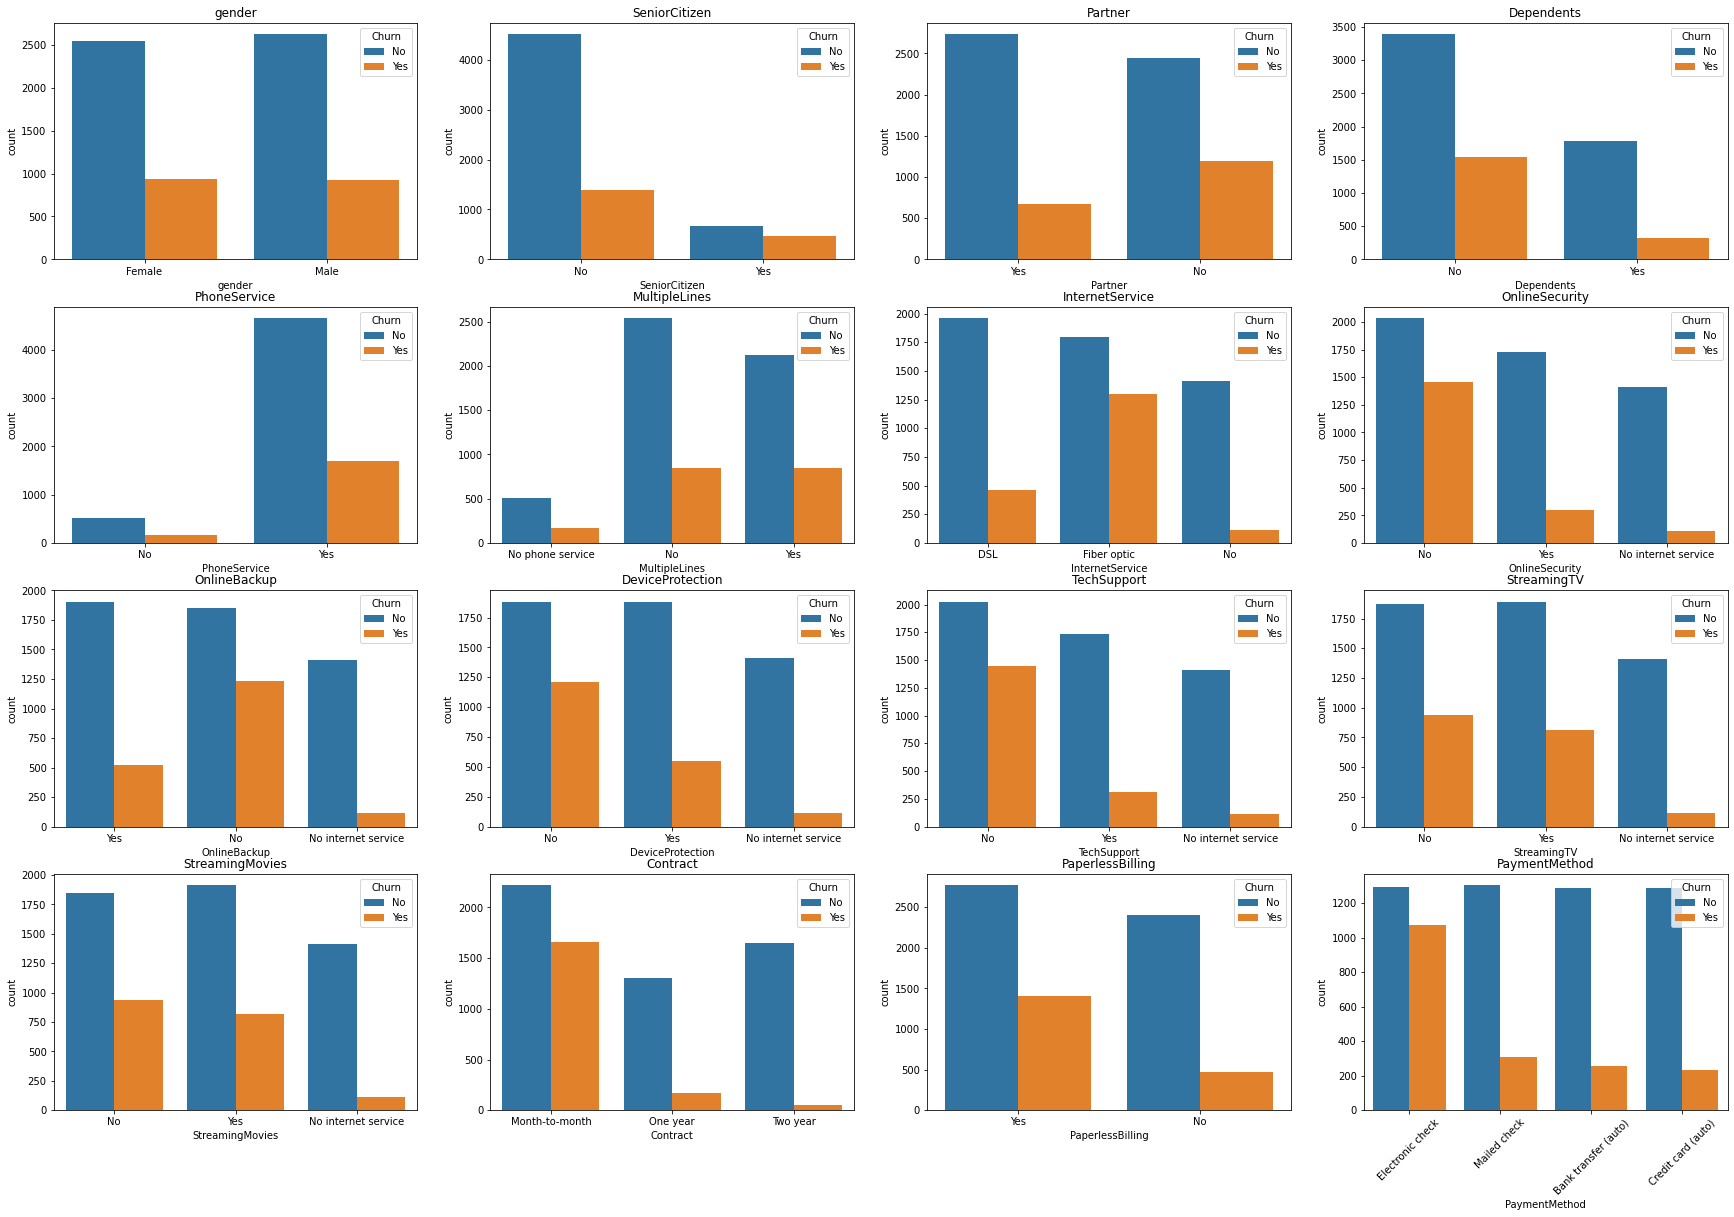

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
axes = axes.flatten()

for i, col in zip(range(0, str_cols.size), str_cols):
    sns.countplot(data = df, x = col, ax = axes[i], hue = 'Churn')
    #axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
    axes[i].set_title(col)

# fixing readability of PaymentMethod graph
axes[15].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer (auto)', 'Credit card (auto)'], rotation = 45);

#### Numeric

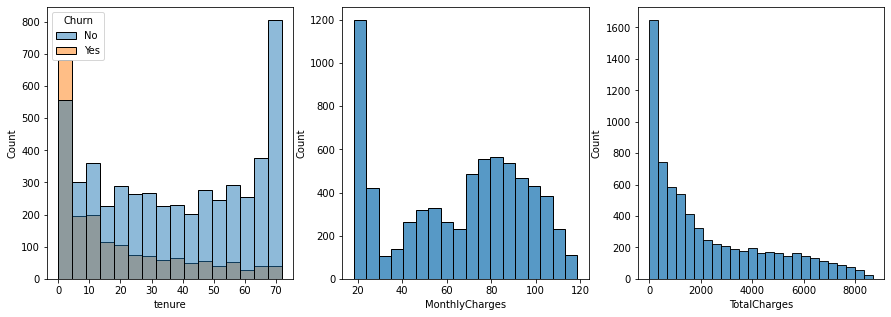

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.histplot(data = df, x = 'tenure', ax  = axes[0], hue = 'Churn')
sns.histplot(data = df, x = 'MonthlyCharges', ax  = axes[1])
sns.histplot(data = df, x = 'TotalCharges', ax  = axes[2])

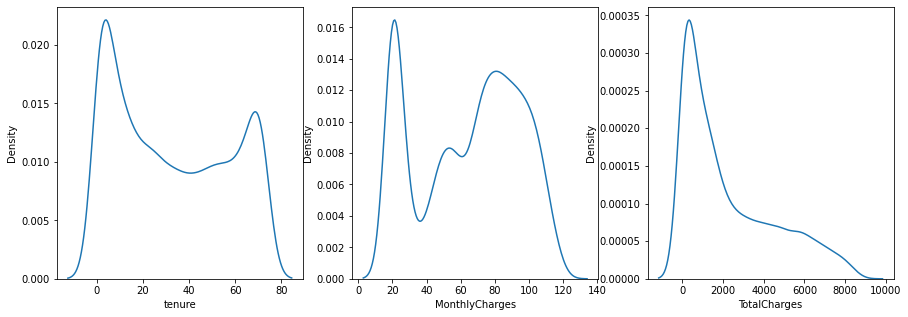

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.kdeplot(data = df, x = 'tenure', ax  = axes[0])
sns.kdeplot(data = df, x = 'MonthlyCharges', ax  = axes[1])
sns.kdeplot(data = df, x = 'TotalCharges', ax  = axes[2])

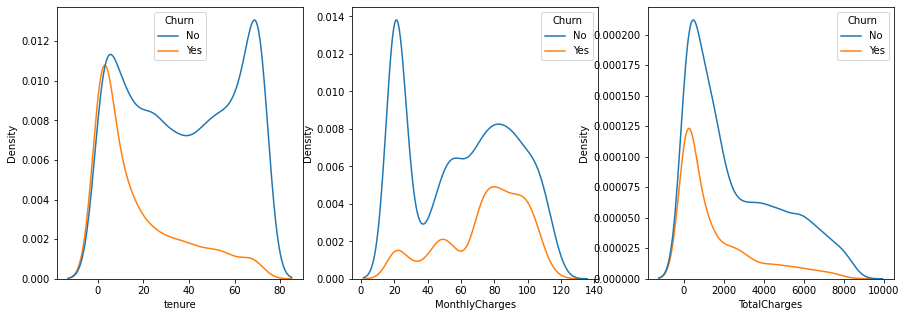

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.kdeplot(data = df, x = 'tenure', ax  = axes[0], hue = 'Churn')
sns.kdeplot(data = df, x = 'MonthlyCharges', ax  = axes[1], hue = 'Churn')
sns.kdeplot(data = df, x = 'TotalCharges', ax  = axes[2], hue = 'Churn')

I'd also like to consider the difference between the TotalCharges and the product of MonthlyCharges and tenure. Theoretically, these would be the same, but it is apparent that there is a difference for some customers. This might prove fruitful in later analysis.

In [ ]:
df['TotalCharges_Diff'] = df['MonthlyCharges'] * df['tenure'] - df['TotalCharges']

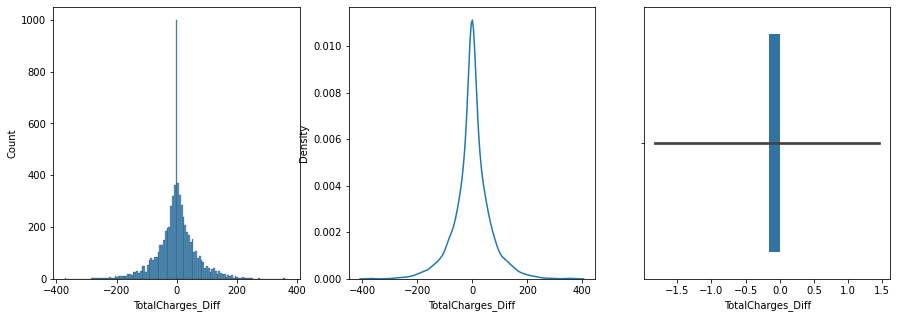

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))

sns.histplot(data = df, x = 'TotalCharges_Diff', ax = axes[0])
sns.kdeplot(data = df, x = 'TotalCharges_Diff', ax = axes[1])
sns.barplot(data = df, x = 'TotalCharges_Diff', ax = axes[2])

Initial Exploration of Multivarate Relationships:

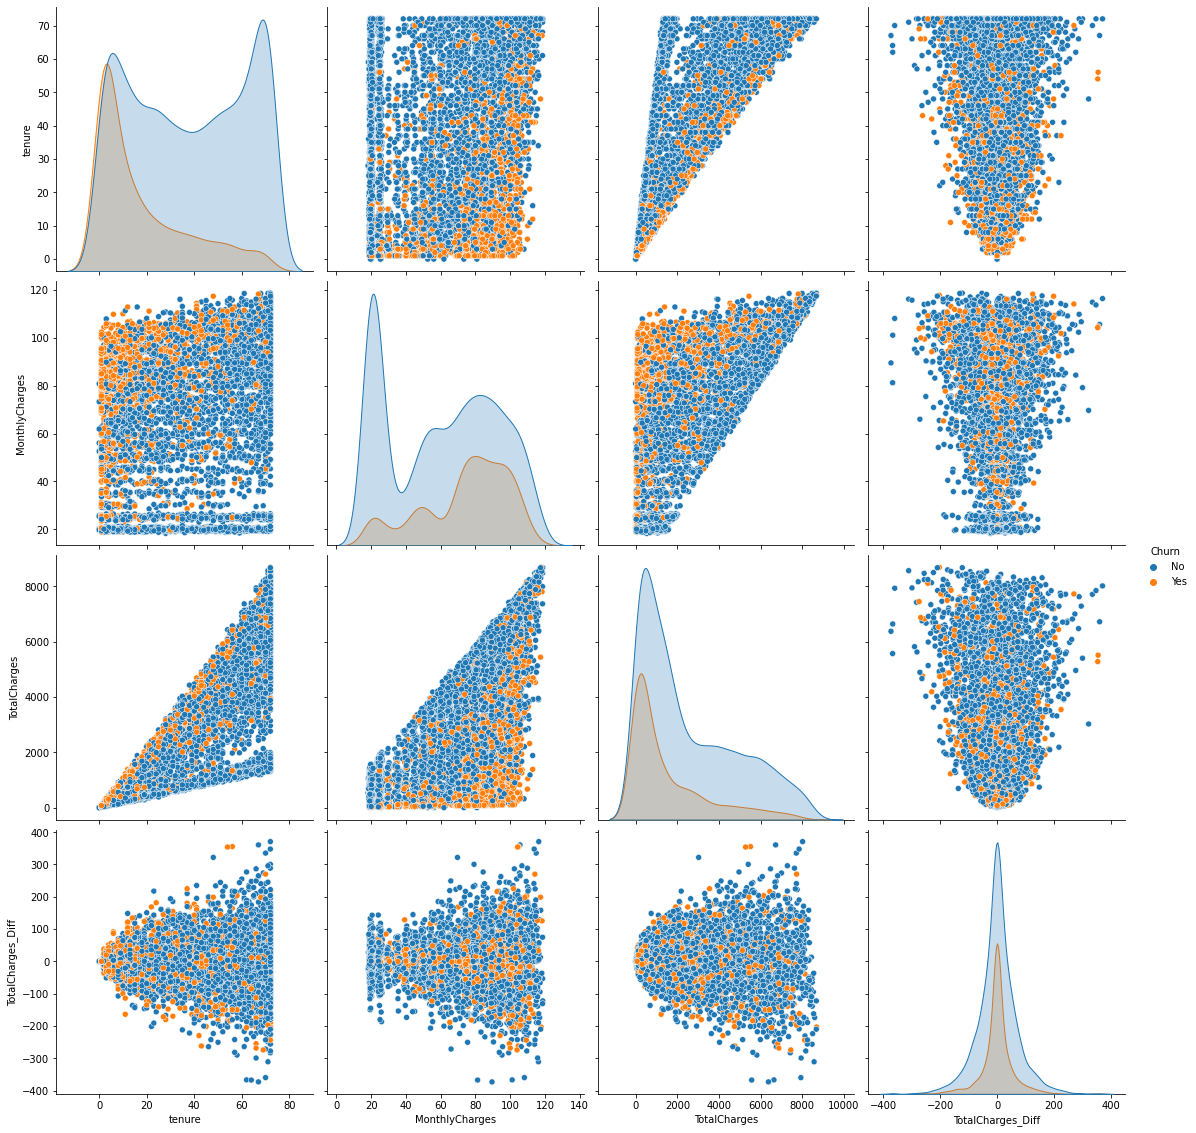

In [ ]:
sns.pairplot(data = df, height = 4, hue = 'Churn')

### Target

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

> This is an unbalanced data set. Good to keep in mind for the modeling stage.

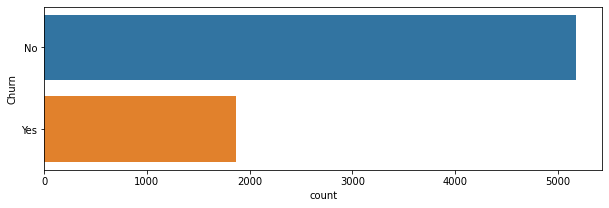

In [ ]:
sns.countplot(data = df, y = 'Churn')

## Multivariate EDA

In [ ]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

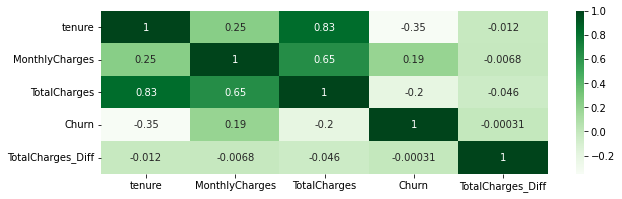

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [ ]:
df_churn = df[df['Churn'] == 1]
df_nochurn = df[df['Churn'] == 0]    

In [ ]:
percentChurn = {}
for cat_col in str_cols:
    percentChurn[cat_col] = df_churn[cat_col].value_counts() / df[cat_col].value_counts()

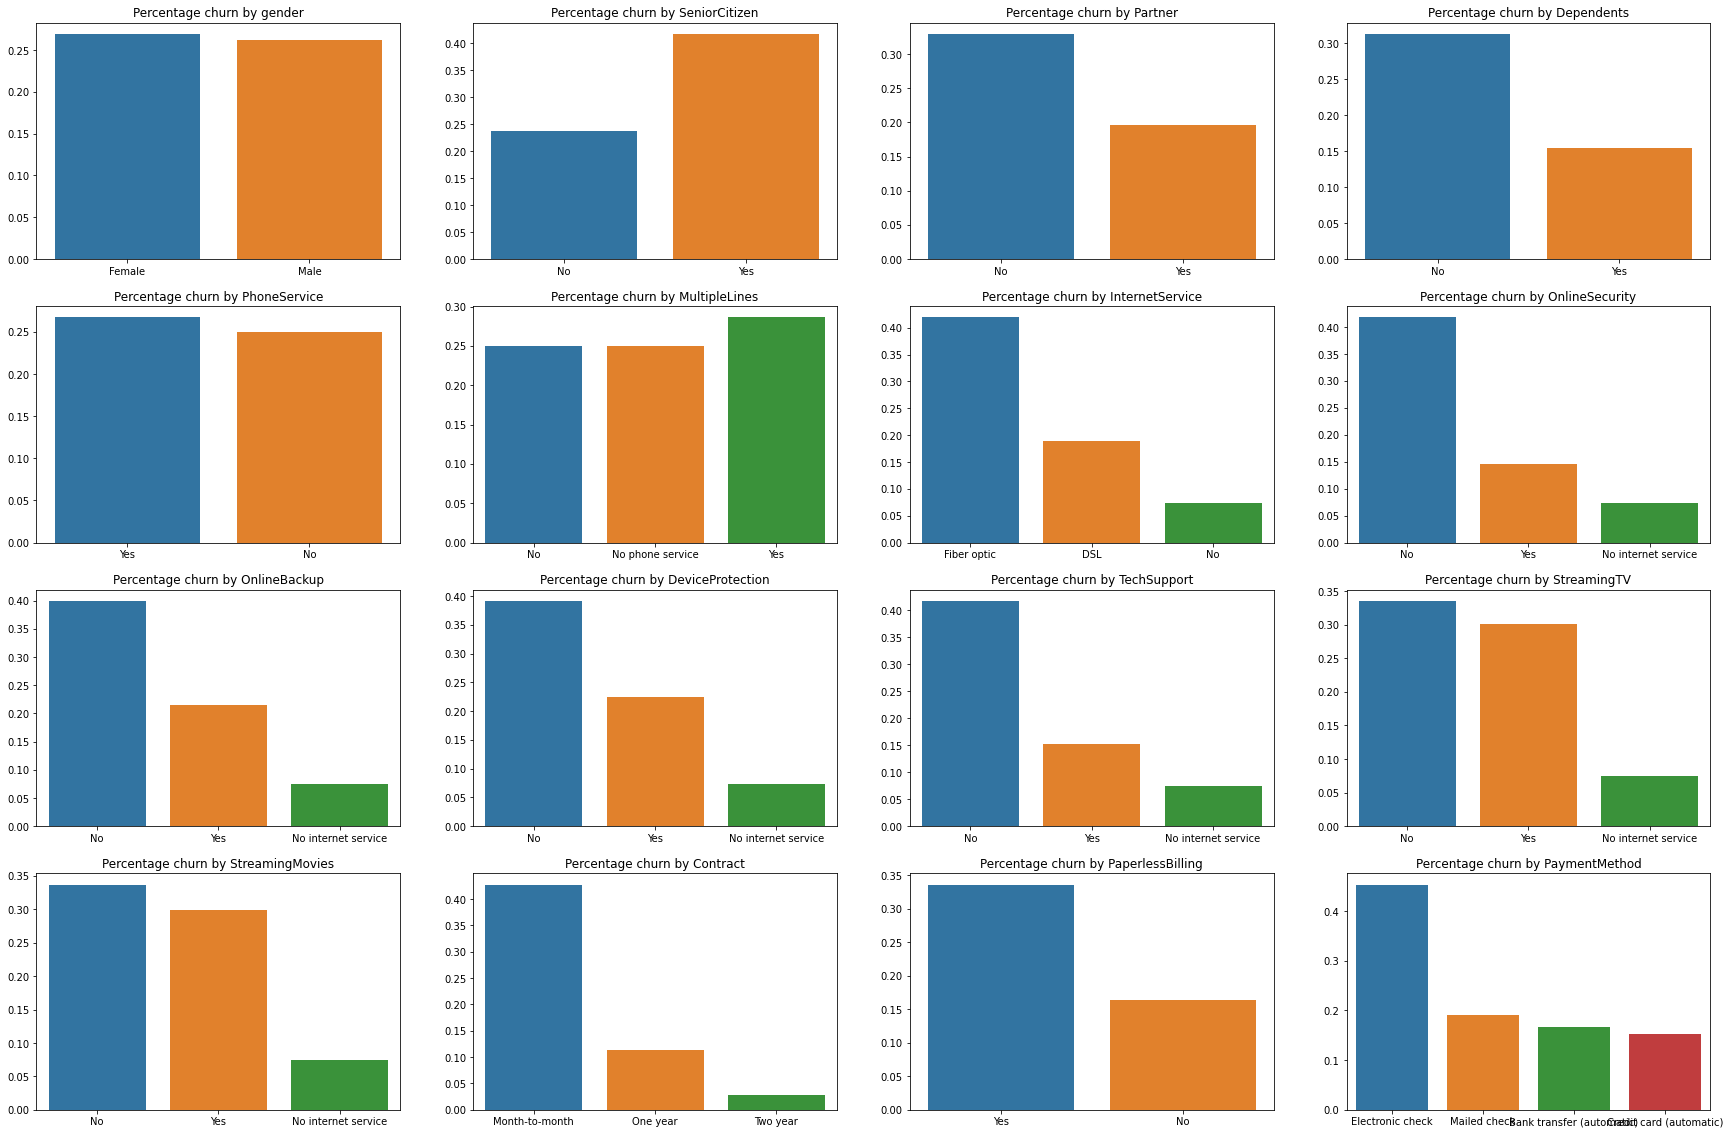

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
axes = axes.flatten()

for i, col in zip(range(0, str_cols.size), str_cols):
    sns.barplot(x = percentChurn[col].index, y = percentChurn[col].values, ax = axes[i])
    #axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
    axes[i].set_title(f"Percentage churn by {col}")

# fixing readability of PaymentMethod graph
#axes[15].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer (auto)', 'Credit card (auto)'], rotation = 45);

In [ ]:
demo_cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents'] #demographic categorical columns
account_info_cat_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod'] #account info categorical columns
services_cat_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', \
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
len(services_cat_columns)

9

In [ ]:
services_cat_columns =  ['TechSupport', 'StreamingTV', 'StreamingMovies']

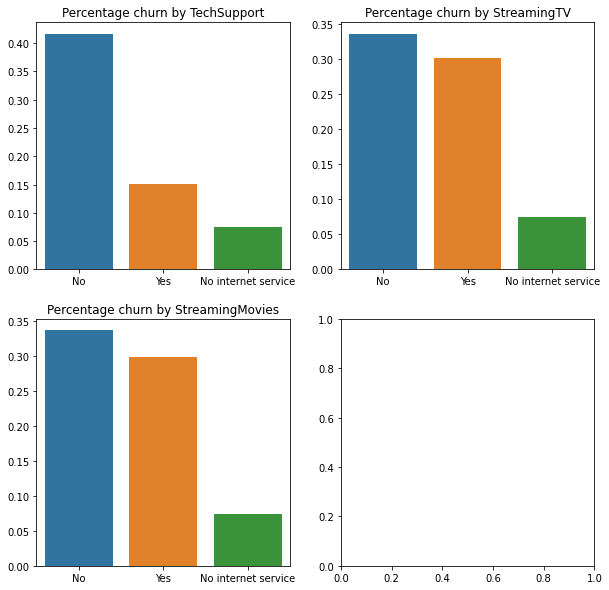

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in zip(range(0, len(services_cat_columns)), services_cat_columns):
    sns.barplot(x = percentChurn[col].index, y = percentChurn[col].values, ax = axes[i])
    #axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
    axes[i].set_title(f"Percentage churn by {col}")

# fixing readability of PaymentMethod graph
#axes[2].set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer (auto)', 'Credit card (auto)'], rotation = 45);

In [ ]:
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

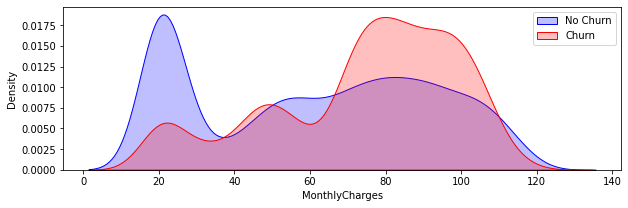

In [ ]:
plt.rcParams["figure.figsize"] = (10,3)
fig = sns.kdeplot(df_nochurn['MonthlyCharges'], shade=True, color="b", label = 'No Churn')
fig = sns.kdeplot(df_churn['MonthlyCharges'], shade=True, color="r", label = 'Churn')
plt.legend()
plt.show()

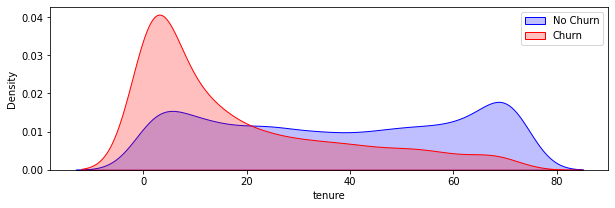

In [ ]:
plt.rcParams["figure.figsize"] = (10,3)
fig = sns.kdeplot(df_nochurn['tenure'], shade=True, color="b", label = 'No Churn')
fig = sns.kdeplot(df_churn['tenure'], shade=True, color="r", label = 'Churn')
plt.legend()
plt.show()

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_Diff
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.732178,0.265370,-0.152954
std,24.559481,30.090047,2266.794434,0.441561,67.202776
min,0.000000,18.250000,0.000000,0.000000,-373.250098
25%,9.000000,35.500000,398.549988,0.000000,-28.500002
50%,29.000000,70.350000,1394.550049,0.000000,0.000000
75%,55.000000,89.850000,3786.599976,1.000000,28.599991
max,72.000000,118.750000,8684.799805,1.000000,370.850195


In [ ]:
df_churn.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_Diff
count,1869.000000,1869.000000,1869.000000,1869.0,1869.000000
mean,17.979133,74.441332,1531.794556,1.0,-0.187264
std,19.531123,24.666053,1890.823242,0.0,55.812596
min,1.000000,18.850000,18.850000,1.0,-274.349902
25%,2.000000,56.150000,134.500000,1.0,-15.999994
50%,10.000000,79.650000,703.549988,1.0,0.000000
75%,29.000000,94.200000,2331.300049,1.0,17.149997
max,72.000000,118.350000,8684.799805,1.0,355.350098


In [ ]:
df_nochurn.describe()

,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_Diff
count,5174.000000,5174.000000,5174.000000,5174.0,5174.000000
mean,37.569965,61.265124,2549.912598,0.0,-0.140560
std,24.113777,31.092648,2329.952148,0.0,70.873515
min,0.000000,18.250000,0.000000,0.0,-373.250098
25%,15.000000,25.100000,572.899979,0.0,-33.524998
50%,38.000000,64.425000,1679.525024,0.0,0.000000
75%,61.000000,88.400000,4262.849976,0.0,32.699969
max,72.000000,118.750000,8672.450195,0.0,370.850195


### Number of Services

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [306]:
df['Internet'] = (df['InternetService'] != 'No').replace({True: 'Yes', False: 'No'})

In [311]:
df['NumServices'] = (df[['PhoneService', 'Internet', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', ]] == 'Yes').sum(axis = 1)

In [319]:
range(1, 9)

range(1, 9)

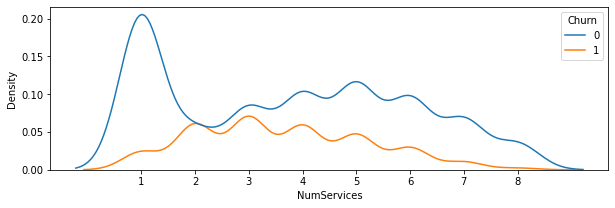

In [321]:
ax = sns.kdeplot(data = df, x = 'NumServices', hue = 'Churn')
ax.xaxis.set_ticks(range(1, 9));